In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
df=pd.read_csv(r'E:\Data Science Boot Camp\DS Cohort 4 EDA\Assignment 2 ML\insurance.csv')
pd.set_option('display.max_columns', None)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
# Creating a new dataframe for preprocessing to preserve the original dataframe
data_preprocessed = df.copy()

# Step 1: Handle missing or anomalous data
# (Already checked and found no missing or anomalous data)

# Step 2: Convert categorical variables into numerical formats using encoding techniques
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['sex', 'smoker', 'region'])

# Step 3: Normalize/Standardize numerical features if required
numerical_features = ['age', 'bmi', 'children', 'charges']
scaler = StandardScaler()
data_preprocessed[numerical_features] = scaler.fit_transform(data_preprocessed[numerical_features])

# Displaying the first few rows of the preprocessed dataset
data_preprocessed.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,True,False,False,True,False,False,False,True
1,-1.509965,0.509621,-0.078767,-0.953689,False,True,True,False,False,False,True,False
2,-0.797954,0.383307,1.580926,-0.728675,False,True,True,False,False,False,True,False
3,-0.441948,-1.305531,-0.908614,0.719843,False,True,True,False,False,True,False,False
4,-0.513149,-0.292556,-0.908614,-0.776802,False,True,True,False,False,True,False,False


In [21]:
df['log_charges'] = np.log(df['charges'])
df['log_bmi'] = np.log(df['bmi'])

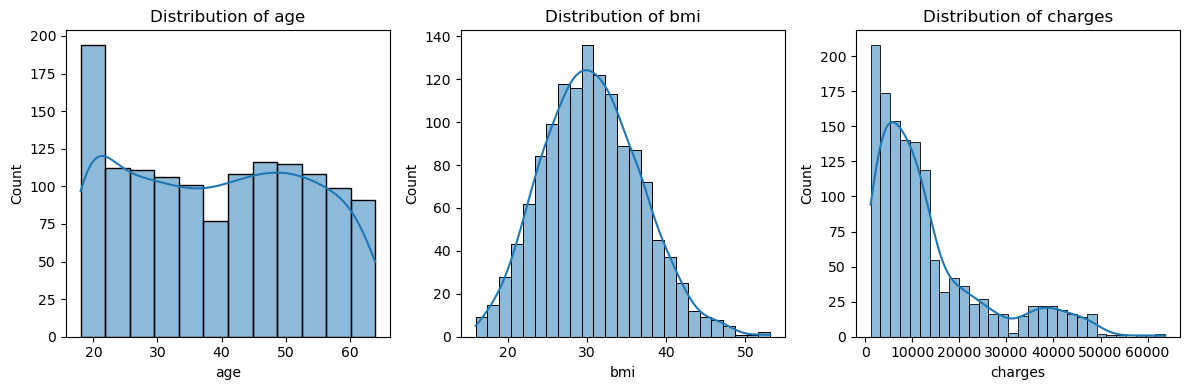

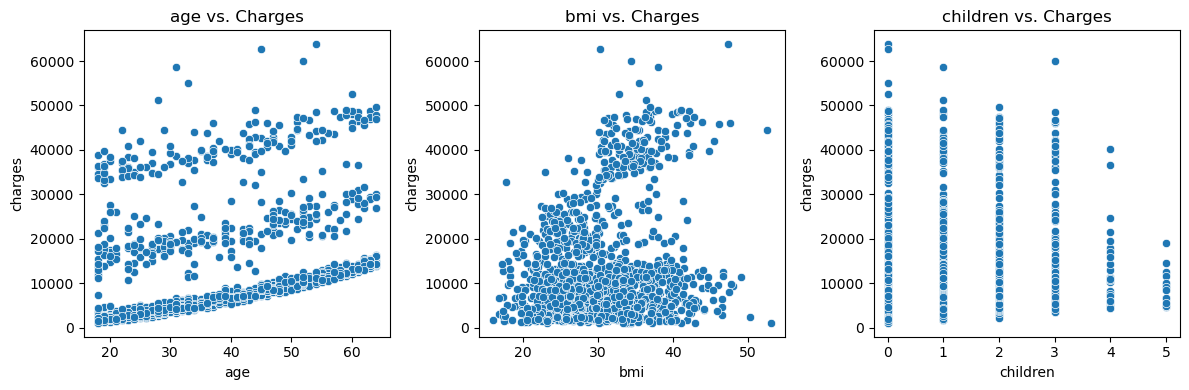

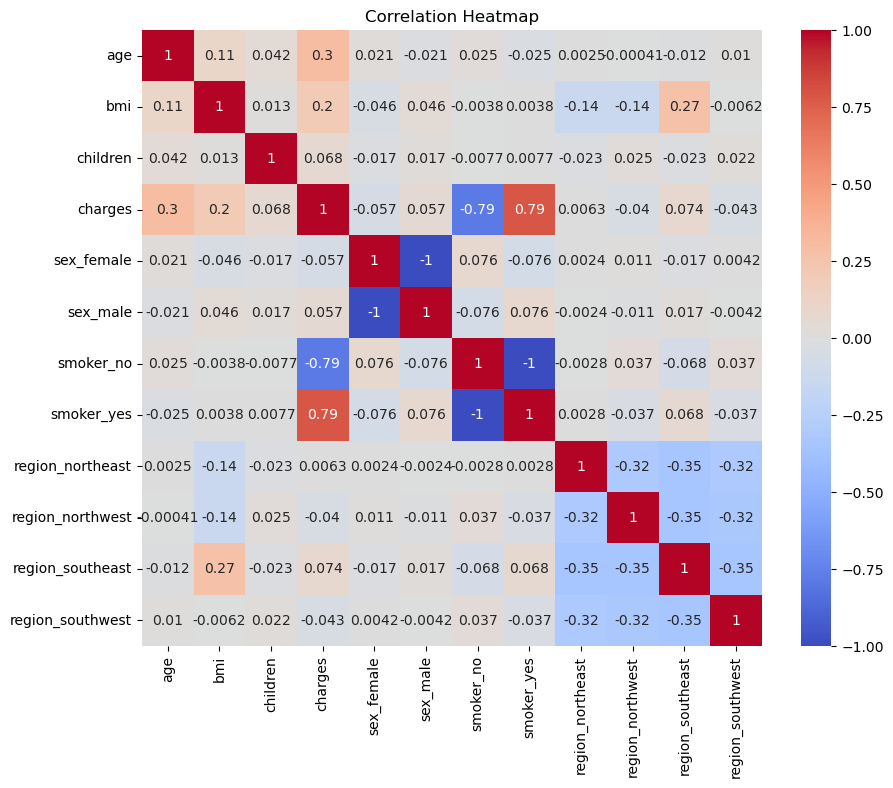

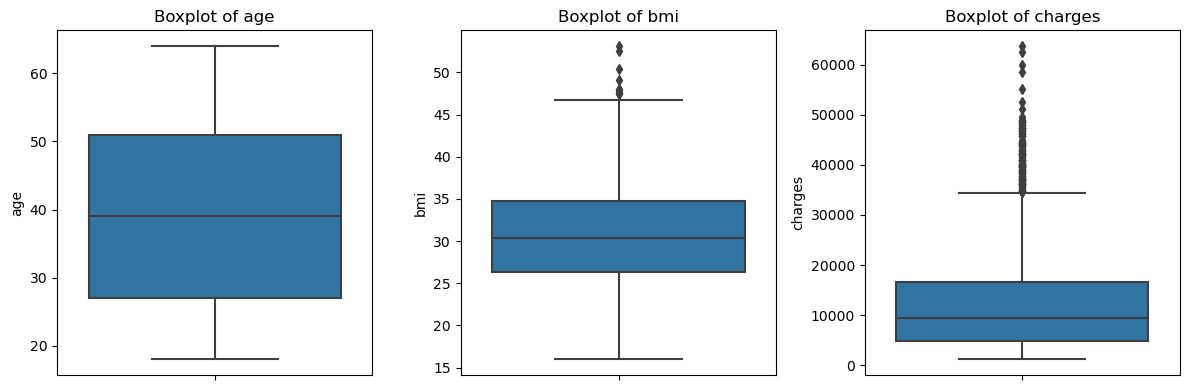

In [23]:
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'E:\Data Science Boot Camp\DS Cohort 4 EDA\Assignment 2 ML\insurance.csv')  

# 1. Analyze the distribution of key variables
plt.figure(figsize=(12, 4))
for i, col in enumerate(['age', 'bmi', 'charges']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('E:\\Data Science Boot Camp\\DS Cohort 4 EDA\\Distribution.png')
plt.show()

# 2. Investigate relationships between features and the target variable
plt.figure(figsize=(12, 4))
for i, col in enumerate(['age', 'bmi', 'children']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[col], y=df['charges'])
    plt.title(f'{col} vs. Charges')
plt.tight_layout()
plt.savefig('E:\\Data Science Boot Camp\\DS Cohort 4 EDA\\Relationship_bw_ft_Tv.png')
plt.show()

# Correlation heatmap with encoded data
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('E:\\Data Science Boot Camp\\DS Cohort 4 EDA\\Correlation_Map.png')
plt.show()

# 3. Identify potential outliers or influential points
plt.figure(figsize=(12, 4))
for i, col in enumerate(['age', 'bmi', 'charges']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.savefig('E:\\Data Science Boot Camp\\DS Cohort 4 EDA\\Outliers_Influential_points.png')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Splitting the dataset into training and testing sets
X = data_preprocessed.drop('charges', axis=1)
y = data_preprocessed['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.22926355667538664
R-squared: 0.7835929767120722


In [13]:
# Extracting coefficients
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])

# Displaying the coefficients
print(coefficients)

                  Coefficient
age                  0.298142
bmi                  0.169748
children             0.042334
sex_female           0.000768
sex_male            -0.000768
smoker_no           -0.976877
smoker_yes           0.976877
region_northeast     0.037965
region_northwest     0.007344
region_southeast    -0.016379
region_southwest    -0.028930


In [14]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}")
print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}")


Ridge Regression - MSE: 0.22942290268849608, R2: 0.7834425664293833
Lasso Regression - MSE: 0.335483934388482, R2: 0.6833291751434815


In [16]:
# Extracting coefficients
coefficients_ridge = pd.DataFrame(ridge_model.coef_, X_train.columns, columns=['Coefficient'])

# Displaying the coefficients
print(coefficients_ridge)

                  Coefficient
age                  0.297769
bmi                  0.169566
children             0.042352
sex_female           0.000602
sex_male            -0.000602
smoker_no           -0.974039
smoker_yes           0.974039
region_northeast     0.037813
region_northwest     0.007165
region_southeast    -0.016051
region_southwest    -0.028927


In [17]:
# Extracting coefficients
coefficients_lasso = pd.DataFrame(lasso_model.coef_, X_train.columns, columns=['Coefficient'])

# Displaying the coefficients
print(coefficients_lasso)

                  Coefficient
age                  0.198729
bmi                  0.073890
children             0.000000
sex_female          -0.000000
sex_male             0.000000
smoker_no           -1.329559
smoker_yes           0.000000
region_northeast     0.000000
region_northwest    -0.000000
region_southeast     0.000000
region_southwest    -0.000000


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np


linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
lasso_model = Lasso(alpha=0.1)

# Perform cross-validation
cv_scores_linear = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_lasso = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the scores for each model
mean_mse_linear = np.mean(cv_scores_linear)
std_mse_linear = np.std(cv_scores_linear)

mean_mse_ridge = np.mean(cv_scores_ridge)
std_mse_ridge = np.std(cv_scores_ridge)

mean_mse_lasso = np.mean(cv_scores_lasso)
std_mse_lasso = np.std(cv_scores_lasso)

# Print the results
print(f"Linear Regression - Mean MSE: {mean_mse_linear}, Std: {std_mse_linear}")
print(f"Ridge Regression - Mean MSE: {mean_mse_ridge}, Std: {std_mse_ridge}")
print(f"Lasso Regression - Mean MSE: {mean_mse_lasso}, Std: {std_mse_lasso}")

Linear Regression - Mean MSE: -0.25189458730430736, Std: 0.016157091521327584
Ridge Regression - Mean MSE: -0.2518894494981935, Std: 0.0159646939863044
Lasso Regression - Mean MSE: -0.334196424715685, Std: 0.016749439229359446
